In [8]:
# read the data and organize 
import glob


faces_folder = 'data/yalefaces'
subfolders = glob.glob(faces_folder+'/*')
subfolders_pruned = subfolders[13:]

from skimage import io
faces = []
for folder in subfolders_pruned:
    faces.append(io.imread(folder))

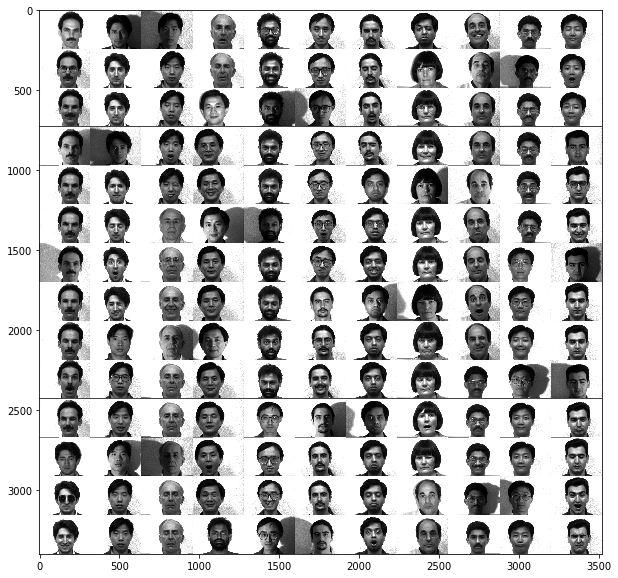

In [11]:
import numpy as np
faces_array = np.array(faces).reshape(11,14,243*320)
faces_tensor = tl.tensor(faces_array)

plt.figure(figsize = (20,10))
plt.imshow(np.swapaxes(np.array(faces_tensor.reshape((11,14*243,320))),0,1).reshape(14*243,11*320),cmap = 'gray')

In [12]:
import tensorly as tl
faces_tensor = tl.tensor(faces_array)

In [13]:
# rank 10 - kernel crashes
from tensorly.decomposition import parafac
factors_kruskal = parafac(faces_tensor, rank=5)

In [14]:
[print(f.shape) for f in factors_kruskal]

(11, 5)
(14, 5)
(77760, 5)


[None, None, None]

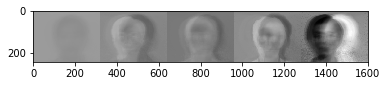

In [15]:
import matplotlib.pyplot as plt
plt.imshow(np.rollaxis(np.array(factors_kruskal[2].reshape((243,320,5))),2,1).reshape(243,5*320),cmap = 'gray')

In [16]:
full_tensor = tl.kruskal_to_tensor(factors_kruskal)

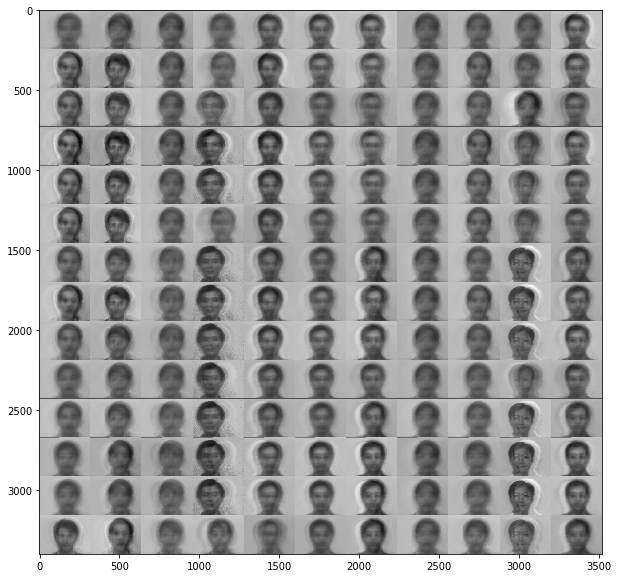

In [17]:
plt.figure(figsize = (20,10))
plt.imshow(np.swapaxes(np.array(full_tensor.reshape((11,14*243,320))),0,1).reshape(14*243,11*320),cmap = 'gray')

In [ ]:
from tensorly.decomposition import tucker
core, factors_tucker = tucker(faces_tensor, ranks = [14,1,10,10])